# Soil property mapping

Alex Koiter

## Load libraries

In [ ]:
suppressPackageStartupMessages({
  library(tidyverse)
  library(terra)
  library(patchwork)
  library(sf)
})

## Load data

In [ ]:
ag_data <- read_csv(here::here("./notebooks/ag_terrain_data.csv"), show_col_types = FALSE) 

forest_data <- read_csv(here::here("./notebooks/forest_terrain_data.csv"), show_col_types = FALSE) 

In [ ]:
theme_right <-  theme(axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        legend.position = "right",
        legend.box.spacing = unit(0, "pt"),
        legend.margin=margin(0,0,0,3),
        legend.justification="left",
        legend.title = element_text(hjust = 0))

theme_left <-  theme(axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        legend.position = "left",
        legend.text.position = "left",
        legend.box.spacing = unit(0, "pt"),
        legend.margin=margin(0,3,0,0),
        legend.justification="right",
        legend.title = element_text(hjust = 1))

theme_bottom <- theme(axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        legend.position = "bottom",
        legend.text.position = "bottom",
        legend.box.spacing = unit(0, "pt"),
        legend.margin=margin(3,0,0,0),
        legend.justification="top")

## Agricultural soil properties

### Geochemisty and colour

In [ ]:
ag_rast <- rast(ag_data)
crs(x = ag_rast, warn=FALSE) <- "epsg:26914"

coords <- read_csv(here::here("./notebooks/coords.csv"), show_col_types = FALSE) %>% 
  st_as_sf(coords = c("long", "lat"),  crs = 4326) %>%
  st_transform(crs = 26914)

a_col <- ggplot() +
  tidyterra::geom_spatraster(data = ag_rast, aes(fill = a_c)) +
  scale_fill_viridis_c(name = bquote(italic("a*")), breaks = seq(2.5, 4, 0.5)) +
  #geom_sf(data = filter(coords, site == "Agriculture")) +
  theme_minimal(base_size = 12) +
  theme_bottom +
  scale_y_continuous(expand = c(0,0)) +
  scale_x_continuous(expand = c(0,0))

b_col <- ggplot() +
  tidyterra::geom_spatraster(data = ag_rast, aes(fill = b_c)) +
  scale_fill_viridis_c(name = bquote(italic("b*")), breaks = seq(7, 10, 1)) +
  #geom_sf(data = filter(coords, site == "Agriculture")) +
  theme_minimal(base_size = 12) +
  theme_bottom +
  scale_y_continuous(expand = c(0,0)) +
  scale_x_continuous(expand = c(0,0))

c_col <- ggplot() +
  tidyterra::geom_spatraster(data = ag_rast, aes(fill = c_c)) +
  scale_fill_viridis_c(name = bquote(italic("c*")), breaks = seq(7, 11, 1)) +
  #geom_sf(data = filter(coords, site == "Agriculture")) +
  theme_minimal(base_size = 12) + 
  theme_bottom +
  scale_y_continuous(expand = c(0,0)) +
  scale_x_continuous(expand = c(0,0))

h_col <- ggplot() +
  tidyterra::geom_spatraster(data = ag_rast, aes(fill = h_c)) +
  scale_fill_viridis_c(name = bquote(italic("h*")), breaks = seq(1.15, 1.25, 0.02)) +
  #geom_sf(data = filter(coords, site == "Agriculture")) +
  theme_minimal(base_size = 12) +
  theme_bottom +
  scale_y_continuous(expand = c(0,0)) +
  scale_x_continuous(expand = c(0,0)) 

x_col <- ggplot() +
  tidyterra::geom_spatraster(data = ag_rast, aes(fill = x_c)) +
  scale_fill_viridis_c(name = bquote(italic("x")), breaks = seq(18, 26, 2)) +
  #geom_sf(data = filter(coords, site == "Agriculture")) +
  theme_minimal(base_size = 12) +
  theme_bottom +
  scale_y_continuous(expand = c(0,0)) +
  scale_x_continuous(expand = c(0,0)) 


ca <- ggplot() +
  tidyterra::geom_spatraster(data = ag_rast, aes(fill = ca)) +
  scale_fill_viridis_c(name = "Ca") +
  #geom_sf(data = filter(coords, site == "Agriculture")) +
  theme_minimal(base_size = 12) +
  theme_bottom +
  scale_y_continuous(expand = c(0,0)) +
  scale_x_continuous(expand = c(0,0)) 

co <- ggplot() +
  tidyterra::geom_spatraster(data = ag_rast, aes(fill = co)) +
  scale_fill_viridis_c(name = "Co", breaks = seq(8, 11, 1)) +
  #geom_sf(data = filter(coords, site == "Agriculture")) +
  theme_minimal(base_size = 12) +
  theme_bottom +
  scale_y_continuous(expand = c(0,0)) +
  scale_x_continuous(expand = c(0,0)) 

cs <- ggplot() +
  tidyterra::geom_spatraster(data = ag_rast, aes(fill = cs)) +
  scale_fill_viridis_c(name = "Cs", breaks = seq(0.5, 1.1, 0.2), limits = c(0.4, 1.1)) +
  #geom_sf(data = filter(coords, site == "Agriculture")) +
  theme_minimal(base_size = 12) +
  theme_bottom +
  scale_y_continuous(expand = c(0,0)) +
  scale_x_continuous(expand = c(0,0))

fe <- ggplot() +
  tidyterra::geom_spatraster(data = ag_rast, aes(fill = fe)) +
  scale_fill_viridis_c(name = "Cs") +
  #geom_sf(data = filter(coords, site == "Agriculture")) +
  theme_minimal(base_size = 12) +
  theme_bottom +
  scale_y_continuous(expand = c(0,0)) +
  scale_x_continuous(expand = c(0,0))

li <- ggplot() +
  tidyterra::geom_spatraster(data = ag_rast, aes(fill = li)) +
  scale_fill_viridis_c(name = "Li", breaks = seq(14, 20, 2), limits = c(13, 20)) +
  #geom_sf(data = filter(coords, site == "Agriculture")) +
  theme_minimal(base_size = 12) +
  theme_bottom +
  scale_y_continuous(expand = c(0,0)) +
  scale_x_continuous(expand = c(0,0))

la <- ggplot() +
  tidyterra::geom_spatraster(data = ag_rast, aes(fill = la)) +
  scale_fill_viridis_c(name = "La", breaks = seq(16, 20, 1), limits = c(16, 20)) +
  #geom_sf(data = filter(coords, site == "Agriculture")) +
  theme_minimal(base_size = 12) +
  theme_bottom +
  scale_y_continuous(expand = c(0,0)) +
  scale_x_continuous(expand = c(0,0))

nb <- ggplot() +
  tidyterra::geom_spatraster(data = ag_rast, aes(fill = nb)) +
  scale_fill_viridis_c(name = "Nb") +
  #geom_sf(data = filter(coords, site == "Agriculture")) +
  theme_minimal(base_size = 12) +
  theme_bottom +
  scale_y_continuous(expand = c(0,0)) +
  scale_x_continuous(expand = c(0,0))

ni <- ggplot() +
  tidyterra::geom_spatraster(data = ag_rast, aes(fill = ni)) +
  scale_fill_viridis_c(name = "Ni") +
  #geom_sf(data = filter(coords, site == "Agriculture")) +
  theme_minimal(base_size = 12) +
  theme_bottom +
  scale_y_continuous(expand = c(0,0)) +
  scale_x_continuous(expand = c(0,0))

rb <- ggplot() +
  tidyterra::geom_spatraster(data = ag_rast, aes(fill = rb)) +
  scale_fill_viridis_c(name = "Rb") +
  #geom_sf(data = filter(coords, site == "Agriculture")) +
  theme_minimal(base_size = 12) +
  theme_bottom +
  scale_y_continuous(expand = c(0,0)) +
  scale_x_continuous(expand = c(0,0))

sr <- ggplot() +
  tidyterra::geom_spatraster(data = ag_rast, aes(fill = sr)) +
  scale_fill_viridis_c(name = "Sr") +
  #geom_sf(data = filter(coords, site == "Agriculture")) +
  theme_minimal(base_size = 12) +
  theme_bottom +
  scale_y_continuous(expand = c(0,0)) +
  scale_x_continuous(expand = c(0,0))

### Grain size, OM, elevation

In [ ]:
dem <- ggplot() +
  tidyterra::geom_spatraster(data = ag_rast, aes(fill = elevation)) +
  scale_fill_viridis_c(name = "Elevation", option = "inferno", limits = c(309, 312)) +
  #geom_sf(data = filter(coords, site == "Agriculture")) +
  theme_minimal(base_size = 12) +
  theme_bottom +
  scale_y_continuous(expand = c(0,0)) +
  scale_x_continuous(expand = c(0,0))
# 
# ssa <- ggplot() +
#   tidyterra::geom_spatraster(data = ag_rast, aes(fill = ssa)) +
#   scale_fill_viridis_c(name = "SSA") +
#   #geom_sf(data = filter(coords, site == "Agriculture")) +
#   theme_minimal(base_size = 12) +
#   theme_right +
#   scale_y_continuous(expand = c(0,0)) +
#   scale_x_continuous(expand = c(0,0))
# 
# organic <- ggplot() +
#   tidyterra::geom_spatraster(data = ag_rast, aes(fill = organic)) +
#   scale_fill_viridis_c(name = "Organic") +
#   #geom_sf(data = filter(coords, site == "Agriculture")) +
#   theme_minimal(base_size = 12) +
#   theme_left +
#   scale_y_continuous(expand = c(0,0)) +
#   scale_x_continuous(expand = c(0,0))

scale_p <- ggplot() +
  geom_sf(data = filter(coords, site == "Agriculture"), colour = "white") +
  theme_void(base_size = 12)+
  ggspatial::annotation_scale(location = "bl", width_hint = 0.4) +
  ggspatial::annotation_north_arrow(location = "bl", pad_y  = unit(2, "cm"))

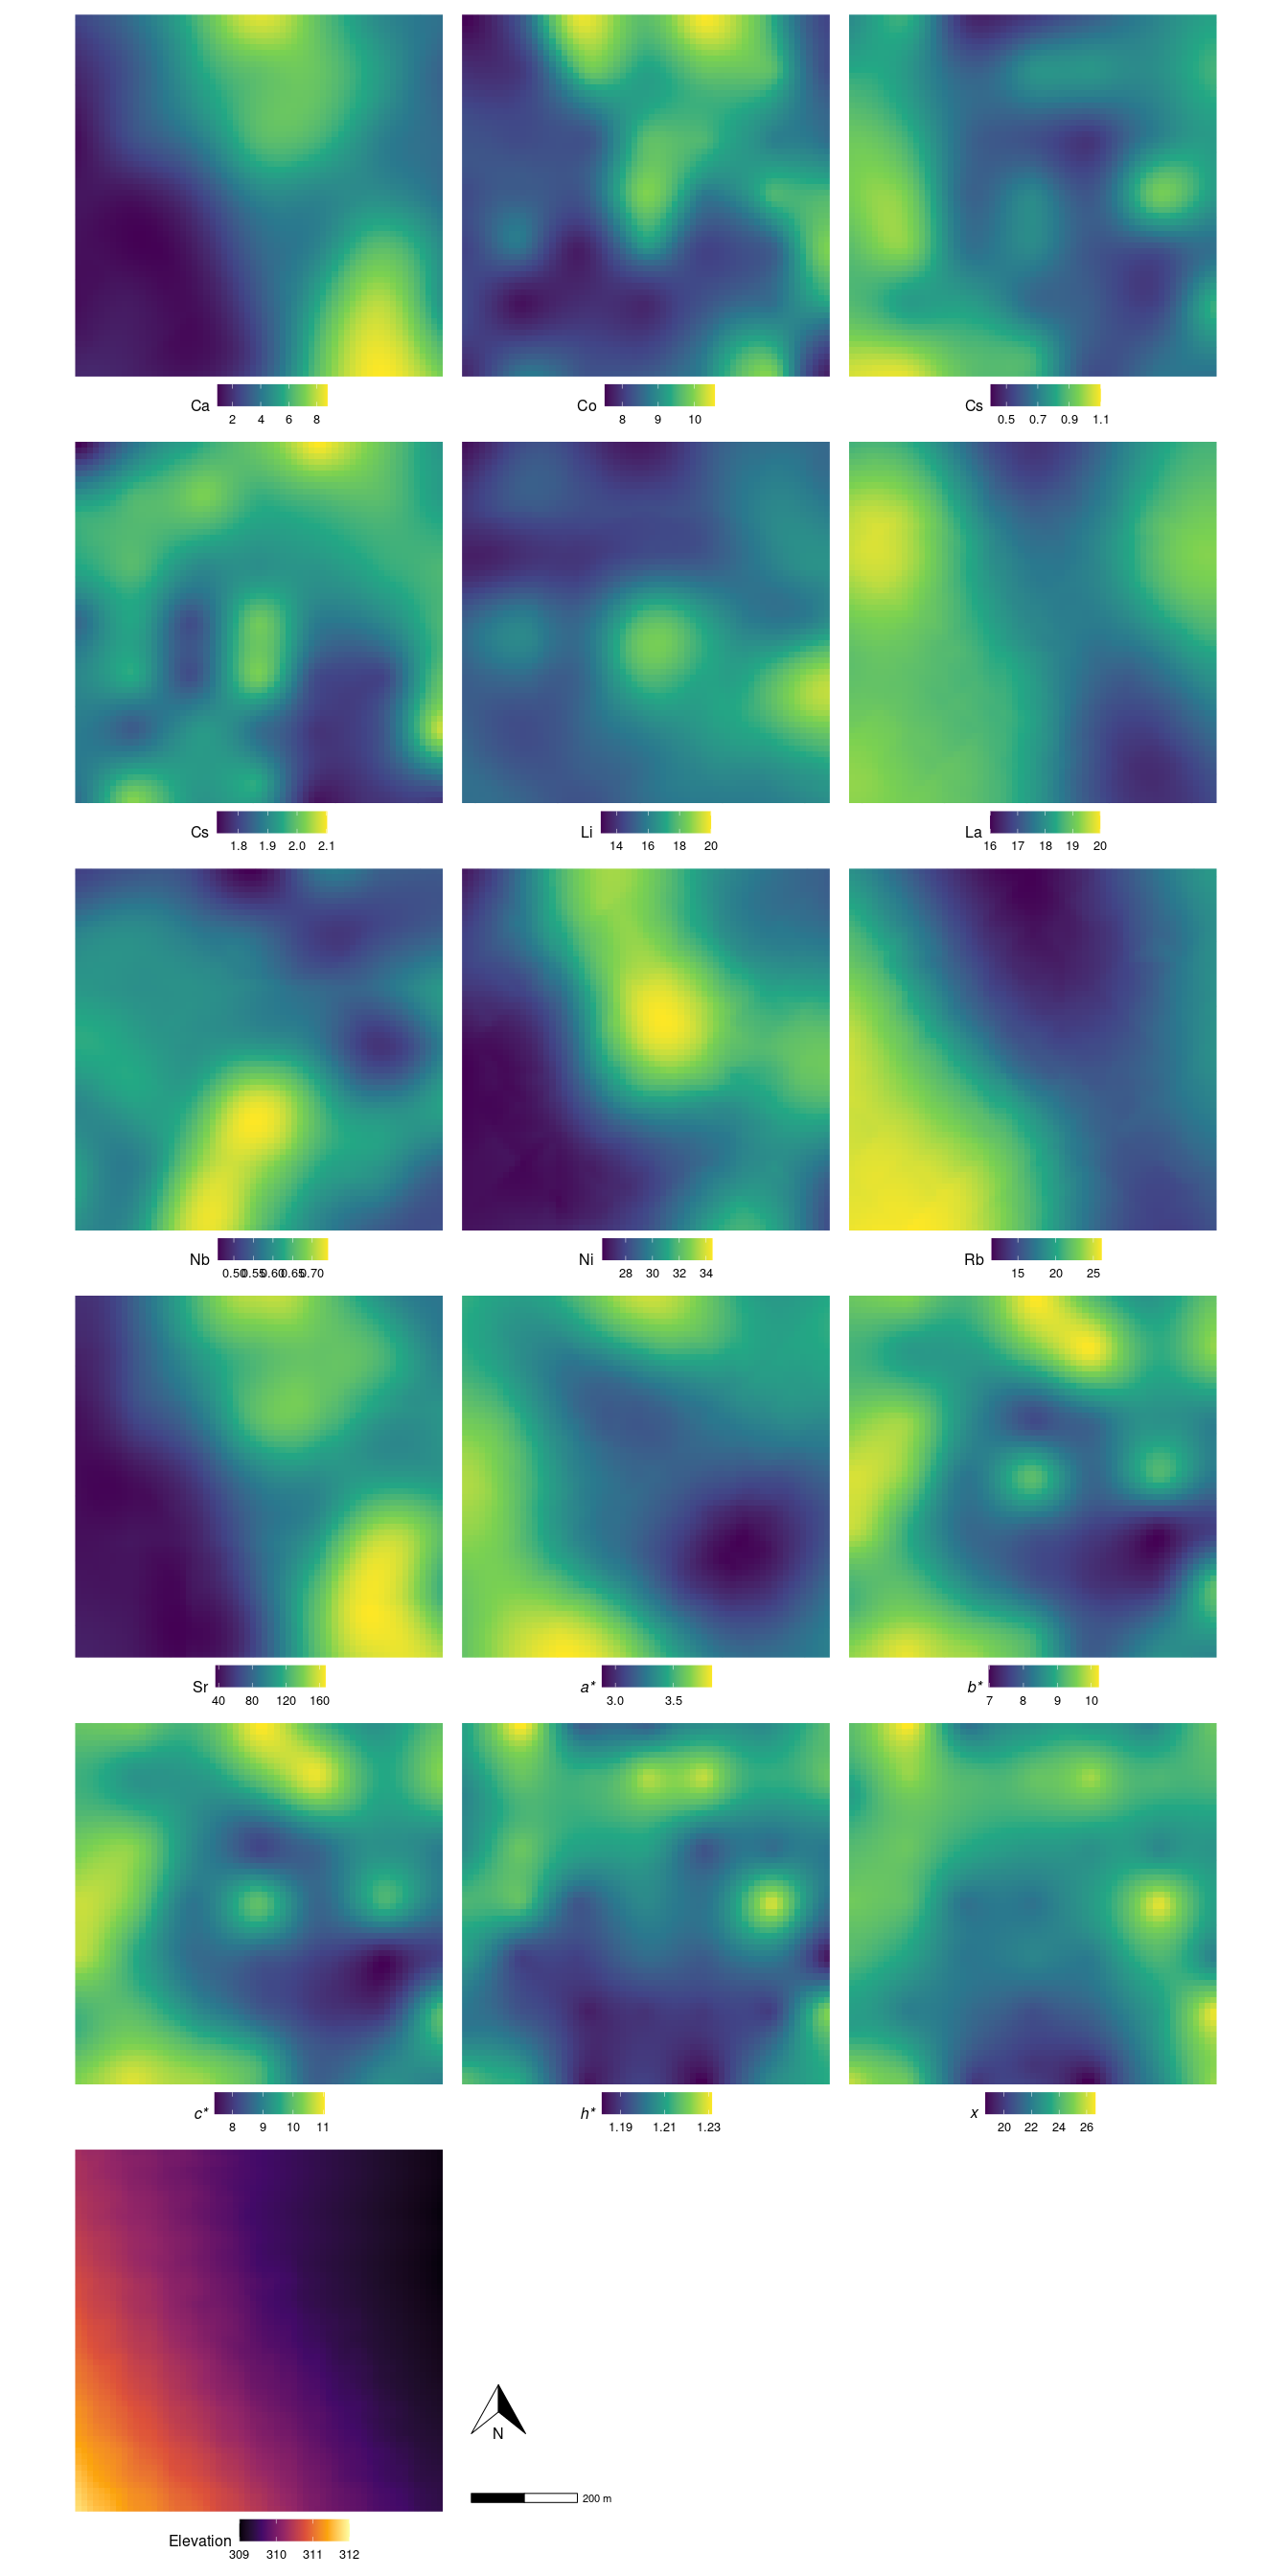

In [ ]:
#| fig-width: 14
#| fig-asp: 2
#| label: fig-ag_map
#| fig-cap: Kriged maps of select colour and geochemical properties and elevtion across the agricultural site.

ca + co + cs + fe + li + la + nb + ni + rb + sr + a_col + b_col + c_col + h_col + x_col + dem + scale_p + plot_layout(ncol = 3) 

## Forest soil properties

### Geochemisty and colour

In [ ]:
forest_rast <- rast(forest_data)
crs(x = forest_rast, warn=FALSE) <- "epsg:26914"

h_col_forest <- ggplot() +
  tidyterra::geom_spatraster(data = forest_rast, aes(fill = h_c)) +
  scale_fill_viridis_c(name = bquote(italic("h*"))) +
  #geom_sf(data = filter(coords, site == "Agriculture")) +
  theme_minimal(base_size = 12) +
  theme_bottom +
  scale_y_continuous(expand = c(0,0)) +
  scale_x_continuous(expand = c(0,0))

x_col_forest <- ggplot() +
  tidyterra::geom_spatraster(data = forest_rast, aes(fill = x_c)) +
  scale_fill_viridis_c(name = bquote(italic("x"))) +
  #geom_sf(data = filter(coords, site == "Agriculture")) +
  theme_minimal(base_size = 12) + 
  theme_bottom +
  scale_y_continuous(expand = c(0,0)) +
  scale_x_continuous(expand = c(0,0))

ca_forest <- ggplot() +
  tidyterra::geom_spatraster(data = forest_rast, aes(fill = ca)) +
  scale_fill_viridis_c(name = "Ca") +
  #geom_sf(data = filter(coords, site == "Agriculture")) +
  theme_minimal(base_size = 12) +
  theme_bottom +
  scale_y_continuous(expand = c(0,0)) +
  scale_x_continuous(expand = c(0,0)) 

co_forest <- ggplot() +
  tidyterra::geom_spatraster(data = forest_rast, aes(fill = co)) +
  scale_fill_viridis_c(name = "Co") +
  #geom_sf(data = filter(coords, site == "Agriculture")) +
  theme_minimal(base_size = 12) +
  theme_bottom +
  scale_y_continuous(expand = c(0,0)) +
  scale_x_continuous(expand = c(0,0)) 

cs_forest <- ggplot() +
  tidyterra::geom_spatraster(data = forest_rast, aes(fill = cs)) +
  scale_fill_viridis_c(name = "Cs") +
  #geom_sf(data = filter(coords, site == "Agriculture")) +
  theme_minimal(base_size = 12) +
  theme_bottom +
  scale_y_continuous(expand = c(0,0)) +
  scale_x_continuous(expand = c(0,0)) 

la_forest <- ggplot() +
  tidyterra::geom_spatraster(data = forest_rast, aes(fill = la)) +
  scale_fill_viridis_c(name = "La") +
  #geom_sf(data = filter(coords, site == "Agriculture")) +
  theme_minimal(base_size = 12) +
  theme_bottom +
  scale_y_continuous(expand = c(0,0)) +
  scale_x_continuous(expand = c(0,0)) 

li_forest <- ggplot() +
  tidyterra::geom_spatraster(data = forest_rast, aes(fill = li)) +
  scale_fill_viridis_c(name = "Li") +
  #geom_sf(data = filter(coords, site == "Agriculture")) +
  theme_minimal(base_size = 12) +
  theme_bottom +
  scale_y_continuous(expand = c(0,0)) +
  scale_x_continuous(expand = c(0,0)) 

nb_forest <- ggplot() +
  tidyterra::geom_spatraster(data = forest_rast, aes(fill = nb)) +
  scale_fill_viridis_c(name = "Nb") +
  #geom_sf(data = filter(coords, site == "Forest")) +
  theme_minimal(base_size = 12) +
  theme_bottom +
  scale_y_continuous(expand = c(0,0)) +
  scale_x_continuous(expand = c(0,0)) 

ni_forest <- ggplot() +
  tidyterra::geom_spatraster(data = forest_rast, aes(fill = ni)) +
  scale_fill_viridis_c(name = "Ni") +
  #geom_sf(data = filter(coords, site == "Forest")) +
  theme_minimal(base_size = 12) +
  theme_bottom +
  scale_y_continuous(expand = c(0,0)) +
  scale_x_continuous(expand = c(0,0)) 

sr_forest <- ggplot() +
  tidyterra::geom_spatraster(data = forest_rast, aes(fill = sr)) +
  scale_fill_viridis_c(name = "Sr") +
  #geom_sf(data = filter(coords, site == "Forest")) +
  theme_minimal(base_size = 12) +
  theme_bottom +
  scale_y_continuous(expand = c(0,0)) +
  scale_x_continuous(expand = c(0,0)) 

### Grain size, OM, elevation

In [ ]:
dem_forest <- ggplot() +
  tidyterra::geom_spatraster(data = forest_rast, aes(fill = elevation)) +
  scale_fill_viridis_c(name = "Elevation", option = "inferno") +
  #geom_sf(data = filter(coords, site == "Agriculture")) +
  theme_minimal(base_size = 12) +
  theme_bottom +
  scale_y_continuous(expand = c(0,0)) +
  scale_x_continuous(expand = c(0,0))

# ssa_forest <- ggplot() +
#   tidyterra::geom_spatraster(data = forest_rast, aes(fill = ssa)) +
#   scale_fill_viridis_c(name = "SSA") +
#   #geom_sf(data = filter(coords, site == "Agriculture")) +
#   theme_minimal(base_size = 12) +
#   theme_right +
#   scale_y_continuous(expand = c(0,0)) +
#   scale_x_continuous(expand = c(0,0))
# 
# organic_forest <- ggplot() +
#   tidyterra::geom_spatraster(data = forest_rast, aes(fill = organic)) +
#   scale_fill_viridis_c(name = "Organic") +
#   #geom_sf(data = filter(coords, site == "Agriculture")) +
#   theme_minimal(base_size = 12) +
#   theme_left +
#   scale_y_continuous(expand = c(0,0)) +
#   scale_x_continuous(expand = c(0,0))

scale_p_forest <- ggplot() +
  geom_sf(data = filter(coords, site == "Forest"), colour = "white") +
  theme_void(base_size = 12)+
  ggspatial::annotation_scale(location = "bl", width_hint = 0.3) +
  ggspatial::annotation_north_arrow(location = "bl", pad_y  = unit(2, "cm"))

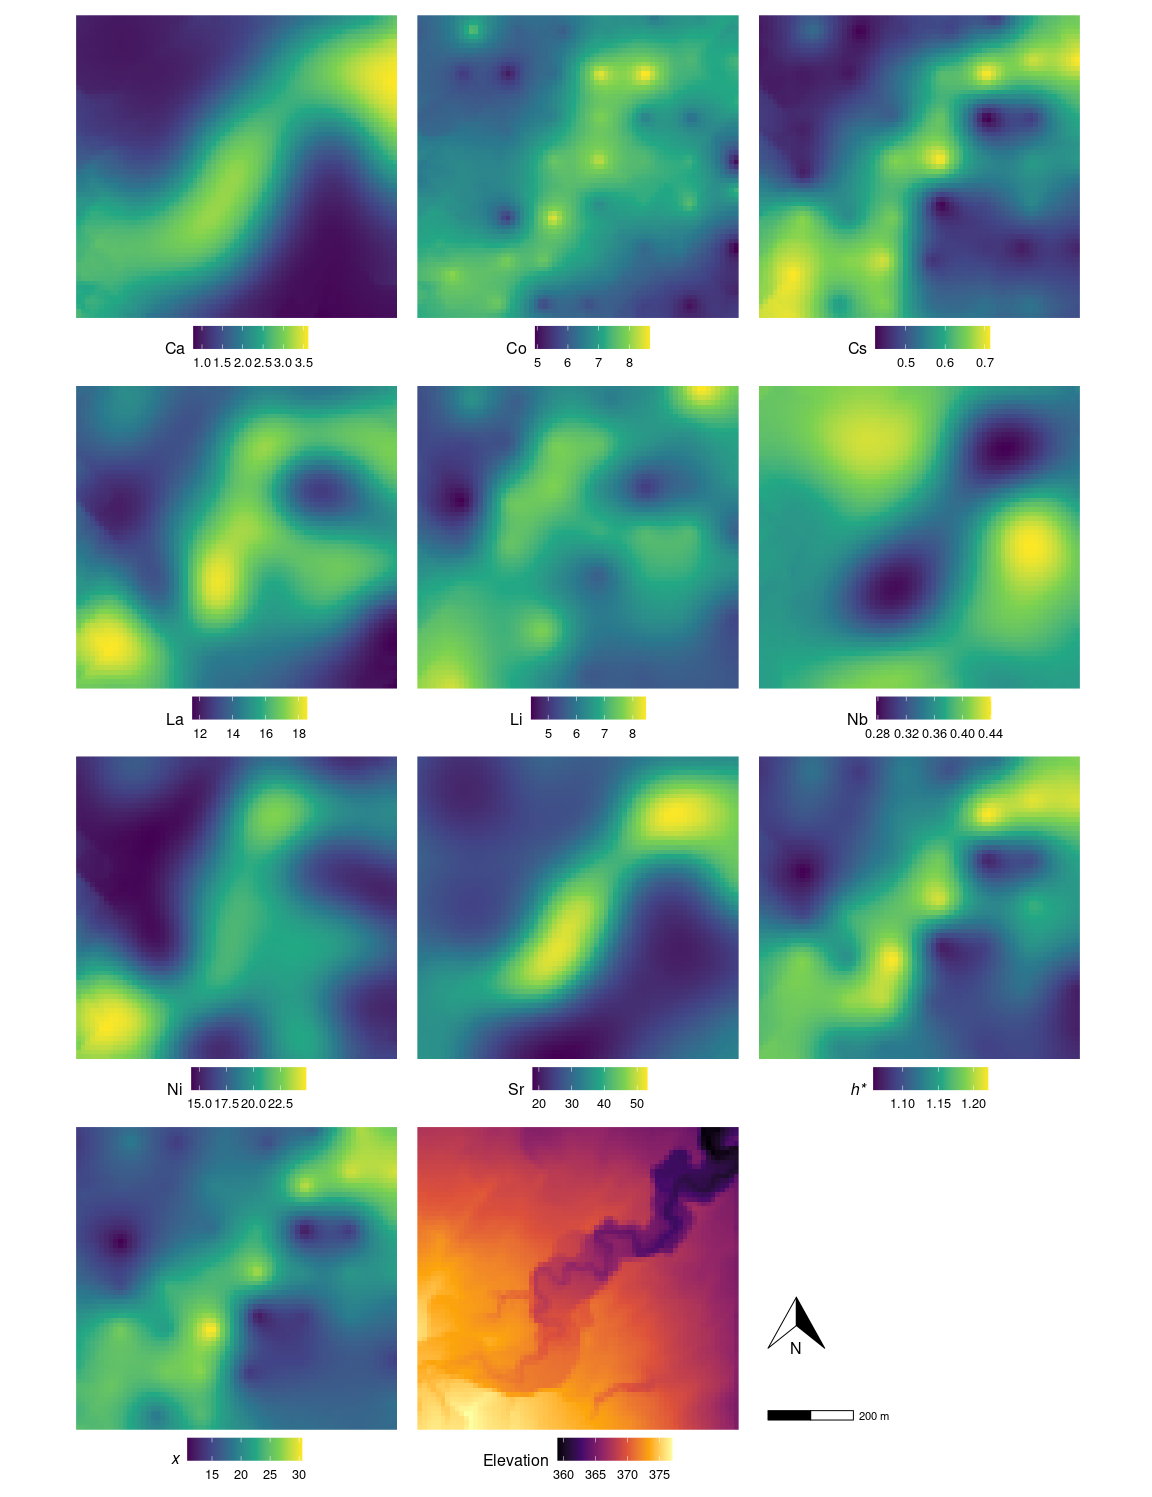

In [ ]:
#| fig-width: 12
#| fig-asp: 1.3
#| label: fig-forest_map
#| fig-cap: Kriged map of select colour and geochemical properties and elevation across the forested site.

ca_forest + co_forest + cs_forest + la_forest + li_forest + nb_forest + ni_forest + sr_forest + h_col_forest + x_col_forest + dem_forest + scale_p_forest +
  plot_layout(ncol = 3) 